# Matplotlib Tutorial

------------------------------------

### Load Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Basic Graph

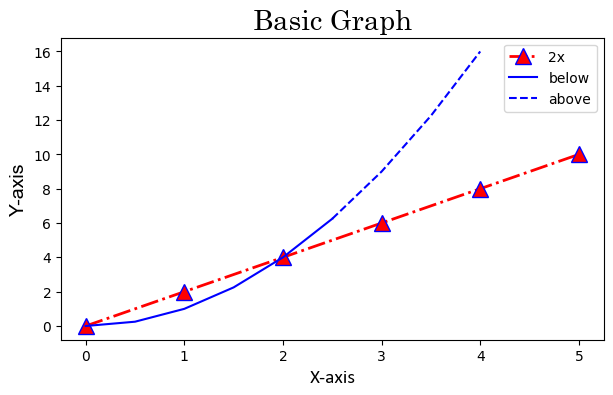

In [2]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 2, 4, 6, 8, 10]

# Resizing the graph
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(x, y, label='2x', color='red', linewidth=2, marker='^', linestyle='dashdot', markersize=12, markeredgecolor='blue')

# Using short-hand notation
# fmt = '[color][marker][line]'
# plt.plot(x, y, 'r.-', label='2x')

# Line number two
x2 = np.arange(0, 4.5, 0.5)
# plt.plot(x2, x2**2, label="x^2")
# Taking only first four values
plt.plot(x2[:6], x2[:6]**2, 'b', label="below")
plt.plot(x2[5:], x2[5:]**2, 'b--', label="above")

# Giving title to the plot
plt.title("Basic Graph", fontdict={'fontname': 'Century', 'fontsize': 20})

# Giving labels to the axis
plt.xlabel("X-axis", fontdict={'fontname': 'Calibri', 'fontsize': 14})
plt.ylabel("Y-axis", fontdict={'fontname': 'Arial', 'fontsize': 14})

# Adding the legend
plt.legend()

# Changing the scale level
#plt.xticks([0, 1, 2, 3, 4, 5])
#plt.yticks([0, 2, 4, 6, 8, 9, 10])

# Saving the graph
plt.savefig('BasicGraph.png', dpi=1000)

plt.show()

### Bar Chart

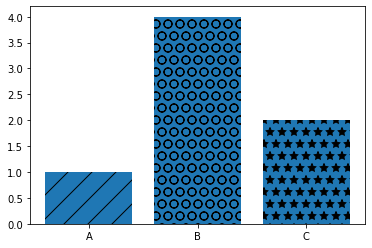

<Figure size 504x288 with 0 Axes>

In [4]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

bars = plt.bar(labels, values)

# Resizing the graph
plt.figure(figsize=(7, 4))

# Hatching
bars[0].set_hatch('/')
bars[1].set_hatch('O')
bars[2].set_hatch('*')

plt.show()

-----------

# Real World Examples

------------

### Line Graph

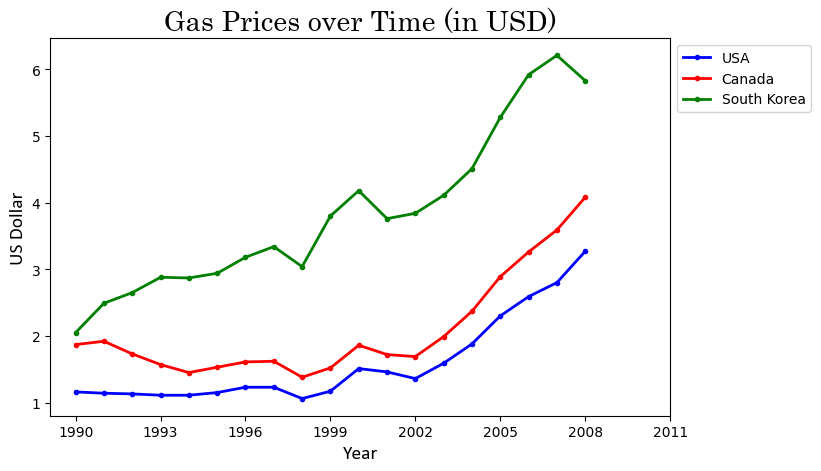

In [46]:
gas = pd.read_csv('gas_prices.csv')
# print(gas.head())

# Resizing the graph
plt.figure(figsize=(8, 5), dpi=100)

plt.title("Gas Prices over Time (in USD)", fontdict={'fontname': 'Century', 'fontsize': 20})

plt.plot(gas.Year, gas.USA, 'b.-', label='USA', linewidth=2)
plt.plot(gas.Year, gas.Canada, 'r.-',  label='Canada', linewidth=2)
plt.plot(gas.Year, gas['South Korea'], 'g.-',  label='South Korea', linewidth=2)

# Another way to plot the graph
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker='.', label=str(country), linewidth=2)

plt.xticks(gas.Year[::3].tolist()+[2011])


plt.xlabel("Year", fontdict={'fontname': 'Calibri', 'fontsize': 14})
plt.ylabel("US Dollar", fontdict={'fontname': 'Calibri', 'fontsize': 14})

# Giving the legend
plt.legend(bbox_to_anchor =(1, 1))

# Saving the graph
plt.savefig("Gas Price.png", dpi=300)

plt.show()

### Histogram

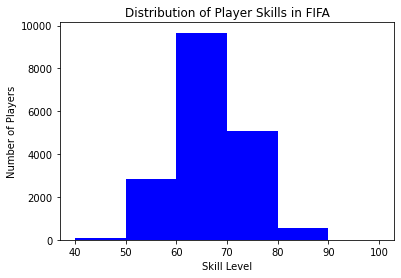

In [61]:
fifa = pd.read_csv("fifa_data.csv")

bins = [40, 50, 60, 70, 80, 90, 100]

plt.hist(fifa.Overall, bins=bins, color='blue')

plt.xticks(bins)

# Giving the labels to axis
plt.xlabel('Skill Level')
plt.ylabel('Number of Players')

# Giving the title to the graph
plt.title("Distribution of Player Skills in FIFA")

plt.show()

### Pie Charts

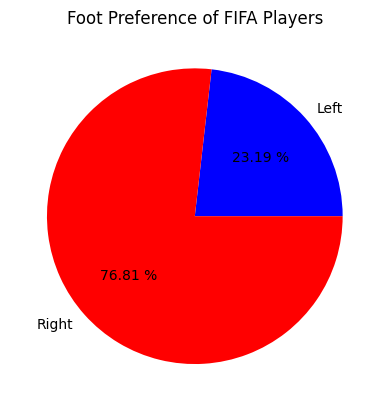

In [96]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.style.use('default')

labels = ['Left', 'Right']
colors = ['blue', 'red']

plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f %%')
plt.title("Foot Preference of FIFA Players")

plt.show()

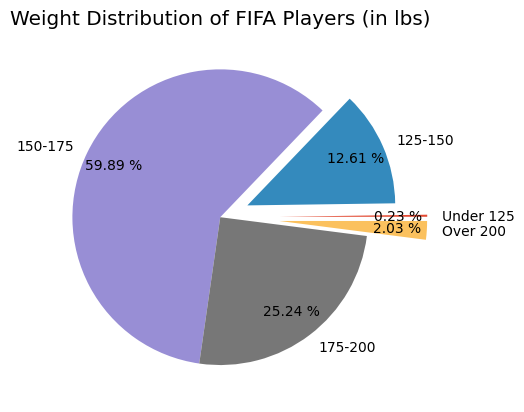

In [100]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

plt.style.use('ggplot')

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

explode = (0.4, 0.2, 0, 0, 0.4)

plt.title('Weight Distribution of FIFA Players (in lbs)')

plt.pie(weights, labels=labels, autopct='%.2f %%', pctdistance=0.8, explode=explode)

plt.show()

### Box and Whisker Chart

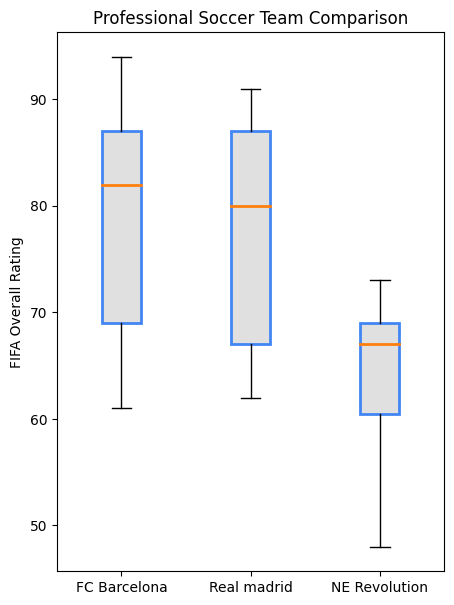

In [120]:
plt.style.use('default')

plt.figure(figsize=(5, 7))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

labels = ['FC Barcelona', 'Real madrid', 'NE Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)

    # Change fill color
    box.set(facecolor='#e0e0e0')

plt.title("Professional Soccer Team Comparison")
plt.ylabel("FIFA Overall Rating")

plt.show()